# Plot sensor value
フォトリフレクタを用いて白線の位置を推定する。  
4つのフォトリフレクタを左右対称に配置し、内側、外側のペアになっているセンサ値の差分から白線の位置を推定する。  
白線を1mmずつ移動させ、各位置ごとにセンサ値の差分を33回取得した。  
合計25回試行し、各位置の差分の平均、標準偏差を描画した。  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = []
data_num = 25
for i in range(data_num):
    data.append(np.loadtxt("data/" + str(190 - i) + ".txt"))

In [3]:
inside_means = np.array([])
outside_means = np.array([])

inside_sigmas = np.array([])
outside_sigmas = np.array([])

for i in data:
    inside_mean = 0
    outside_mean = 0
    
    # 平均値を計算
    for e in i:
        inside_mean  += (e[3] - e[2]) / len(i)
        outside_mean += (e[4] - e[1]) / len(i)
    
    inside_means  = np.append(inside_means, inside_mean)
    outside_means = np.append(outside_means, outside_mean)
    
    inside_sigma = 0
    outside_sigma = 0
    
    # 標準偏差を計算
    for e in i:
        inside_sigma  += ((e[3] - e[2]) - inside_mean)  ** 2 / len(i)
        outside_sigma += ((e[4] - e[1]) - outside_mean) ** 2 / len(i)
        
    inside_sigma  = np.sqrt(inside_sigma)
    outside_sigma = np.sqrt(outside_sigma)
    
    inside_sigmas  = np.append(inside_sigmas, inside_sigma)
    outside_sigmas = np.append(outside_sigmas, outside_sigma)

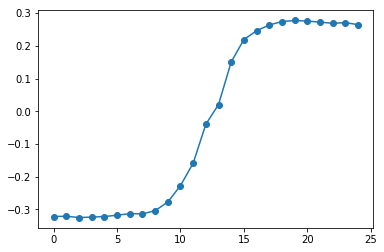

In [4]:
# 内側のセンサ値を描画

plt.errorbar(np.arange(0, len(inside_means), 1), inside_means, yerr=inside_sigmas, marker="o", ecolor='skyblue')
plt.show()

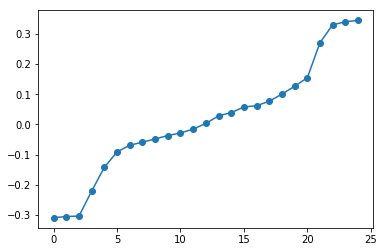

In [5]:
# 外側のセンサ値を描画

plt.errorbar(np.arange(0, len(outside_means), 1), outside_means, yerr=inside_sigmas, marker="o", ecolor='skyblue')
plt.show()

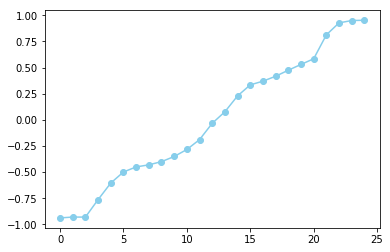

In [6]:
# 内側と外側の合計を描画

out_side_p = 2  # 外側に掛ける係数
total_sensor_value = inside_means + out_side_p * outside_means

plt.plot(np.arange(0, len(outside_means), 1), total_sensor_value, marker="o", color='skyblue')
plt.show()

In [7]:
# total_sensor_valueの時間ごとの差分を計算

diffs = np.array([])

for i in range(len(total_sensor_value) - 1):
    diff = total_sensor_value[i + 1] - total_sensor_value[i]
    diffs = np.append(diffs, diff)
    
diff_max = np.max(diffs)
diffs = diffs / diff_max

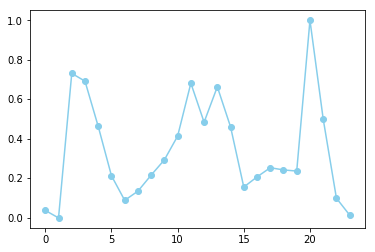

In [8]:
# 差分を描画

plt.plot(np.arange(0, len(diffs), 1), diffs, marker="o", color='skyblue')
plt.show()